<a href="https://colab.research.google.com/github/bhagbat2000/TensorFlow/blob/master/Assingment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs


In [ ]:
url="https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
df=pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


DISMILLARITY MATRIX

In [11]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','romantic','internet']]
dfs.head()


,schoolsup,famsup,paid,activities,nursery,higher,romantic,internet
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,no,yes
2,yes,no,yes,no,yes,yes,no,yes
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [12]:
dfs=dfs.replace('no',0)
dfs=dfs.replace(to_replace='yes',value=1)
dfs.head()


,schoolsup,famsup,paid,activities,nursery,higher,romantic,internet
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,0,1
2,1,0,1,0,1,1,0,1
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [13]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [14]:
m=np.array(dfs[['romantic','internet']])
m=n.reshape(-1,2)
m.shape

(395, 2)

In [16]:
from scipy.spatial import distance

In [17]:
dist_matrix=distance.cdist(n,m)
dist_matrix.shape

(395, 395)

In [18]:
print(dist_matrix)

[[0.         1.41421356 0.         ... 1.         1.         1.        ]
 [1.41421356 0.         1.41421356 ... 1.         1.         1.        ]
 [0.         1.41421356 0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]]


<function matplotlib.pyplot.show>

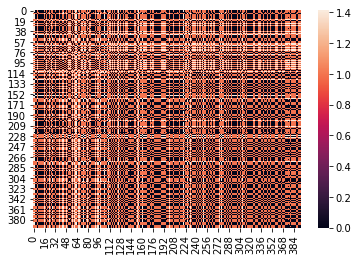

In [19]:
sbs.heatmap(dist_matrix)
plt.show

numerical attribute

In [20]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [24]:
numerical=df[['age','Medu','Fedu','studytime','traveltime','failures']]
numerical.head()


,age,Medu,Fedu,studytime,traveltime,failures
0,18,4,4,2,2,0
1,17,1,1,2,1,0
2,15,1,1,2,1,3
3,15,4,2,3,1,0
4,16,3,3,2,1,0


In [29]:
num2=np.array(numerical[['age','Medu']])
num2=num2.reshape(-1,2)
num2.shape

(395, 2)

In [30]:
num3=np.array(numerical[['Fedu','studytime']])
num3=num3.reshape(-1,2)
num3.shape

(395, 2)

In [31]:
dist_matrix=distance.cdist(num2,num3)
dist_matrix.shape

(395, 395)

<function matplotlib.pyplot.show>

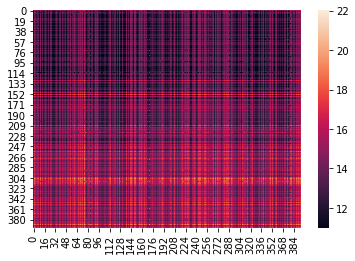

In [32]:
sbs.heatmap(dist_matrix)
plt.show

In [34]:
nominal =df[['Mjob','Fjob','reason','guardian']]
nominal.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [35]:
nominal=nominal.replace('at_home','home')
nominal.head()

,Mjob,Fjob,reason,guardian
0,home,teacher,course,mother
1,home,other,course,father
2,home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [41]:
nominal=nominal.astype('category')
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
lb=LabelEncoder()

In [39]:
nominal['guardian']=lb.fit_transform(nominal['guardian'])
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])

In [43]:
nom=np.array(nominal)
nom.reshape(-1,2)
nom.shape

(395, 4)

In [44]:
nom1=np.array(nominal)
nom1.reshape(-1,2)
nom1.shape

(395, 4)

In [45]:
dist_matrix=distance.cdist(nom,nom1)
dist_matrix.shape

(395, 395)

In [46]:
print(dist_matrix)

[[0.         2.23606798 2.82842712 ... 2.44948974 2.82842712 3.31662479]
 [2.23606798 0.         2.23606798 ... 2.23606798 2.23606798 1.41421356]
 [2.82842712 2.23606798 0.         ... 2.44948974 2.82842712 2.64575131]
 ...
 [2.44948974 2.23606798 2.44948974 ... 0.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.82842712 ... 1.41421356 0.         1.73205081]
 [3.31662479 1.41421356 2.64575131 ... 2.23606798 1.73205081 0.        ]]


<function matplotlib.pyplot.show>

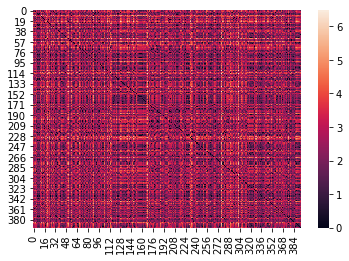

In [47]:
sbs.heatmap(dist_matrix)
plt.show